# Lab Session: Clustering algorithms for Image Segmentation

Author: Jesús Cid Sueiro
Jan. 2017

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

## 1. Introduction

In this notebook we explore an application of clustering algorithms to shape segmentation from binary images. We will carry out some exploratory work with a small set of images provided with this notebook. Most of them are not binary images, so we must do some preliminary work to extract he binary shape images and apply the clustering algorithms to them. We will have the opportunity to test the differences between $k$-means and spectral clustering in this problem.

### 1.1. Load Image

Several images are provided with this notebook:

* BinarySeeds.png
* birds.jpg
* blood_frog_1.jpg
* cKyDP.jpg
* Matricula.jpg
* Matricula2.jpg
* Seeds.png

Select image `birds.jpg` from file and plot it in grayscale

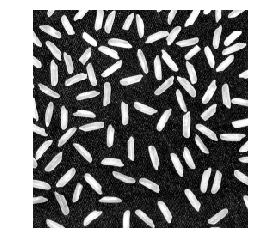

In [2]:
name = "birds.jpg"
name = "Seeds.jpg"

birds = imread("Images/" + name)
birdsG = np.sum(birds, axis=2)

plt.imshow(birdsG, cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')
plt.show()

### 2. Thresholding

Select an intensity threshold by manual inspection of the image histogram

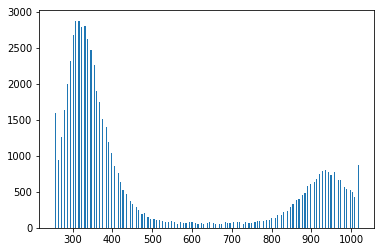

In [3]:
plt.hist(birdsG.ravel(), bins=256)  
plt.show()

Plot the binary image after thresholding.

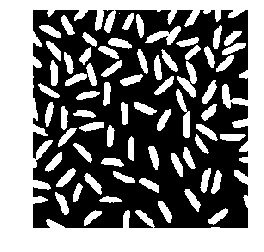

In [4]:
if name == "birds.jpg":
    th = 256
elif name == "Seeds.jpg":
    th = 650

birdsBN = birdsG > th

# If there are more white than black pixels, reverse the image
if np.sum(birdsBN) > float(np.prod(birdsBN.shape)/2):
    birdsBN = 1-birdsBN
plt.imshow(birdsBN, cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')
plt.show()

### 3. Dataset generation

Extract pixel coordinates dataset from image

In [5]:
(h, w) = birdsBN.shape
bW = birdsBN * range(w)
bH = birdsBN * np.array(range(h))[:,np.newaxis]
pSet = [t for t in zip(bW.ravel(), bH.ravel()) if t!=(0,0)]
X = np.array(pSet)


In [6]:
print X

[[ 17   0]
 [ 18   0]
 [ 19   0]
 ..., 
 [214 253]
 [215 253]
 [216 253]]


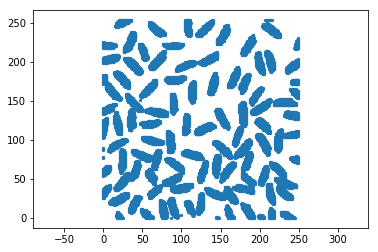

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=5);
plt.axis('equal')
plt.show()

### 4. k-means clustering algorithm



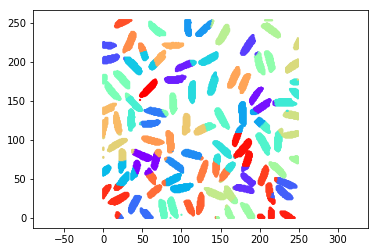

In [8]:
from sklearn.cluster import KMeans

est = KMeans(50)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='rainbow',
            linewidth=0.0)
plt.axis('equal')
plt.show()

### 5. Spectral clustering algorithm

#### 5.1. Affinity matrix

Compute and visualize the affinity matrix

In [9]:
from sklearn.metrics.pairwise import rbf_kernel

gamma = 5
sf = 4
Xsub = X[0::sf]
print Xsub.shape
gamma = 0.001
K = rbf_kernel(Xsub, Xsub, gamma=gamma)

(4206, 2)


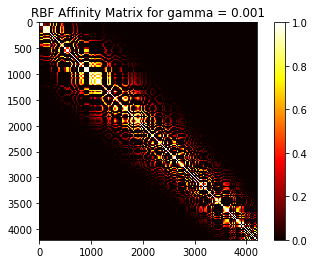

In [10]:
plt.imshow(K, cmap='hot')
plt.colorbar()
plt.title('RBF Affinity Matrix for gamma = ' + str(gamma))
plt.grid('off')
plt.show()

In [11]:
from sklearn.cluster import SpectralClustering

spc = SpectralClustering(n_clusters=50, gamma=gamma, affinity='rbf')
y_kmeans = spc.fit_predict(Xsub)

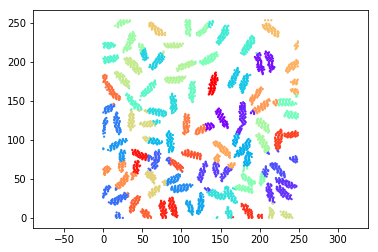

In [12]:
plt.scatter(Xsub[:,0], Xsub[:,1], c=y_kmeans, s=5, cmap='rainbow', linewidth=0.0)
plt.axis('equal')
plt.show()

In [13]:
print X[:,1]

[  0   0   0 ..., 253 253 253]
